In [70]:
import numpy as np

L= 4
n=[4,8,8,8,4]

#creating the weight matrix and bias matrices

W1=np.random.randn(n[1],n[0])
W2=np.random.randn(n[2],n[1])
W3=np.random.randn(n[3],n[2])
W4=np.random.randn(n[4],n[3])

b1=np.random.randn(n[1],1)
b2=np.random.randn(n[2],1)
b3=np.random.randn(n[3],1)
b4=np.random.randn(n[4],1)

In [71]:
def my_data():
    X = np.array([#input array with binary values of 10 random numbers in 4-bit notation
    [0,0,1,1],
    [1,1,0,0],
    [0,1,1,1],
    [0,0,0,1],
    [1,1,1,0],
    [0,1,0,1],
    [1,0,0,1],
    [0,0,1,0],
    [1,0,1,1],
    [1,0,1,1]])
    
    Yi=np.array([
    [0,0,1,1],
    [1,1,0,0],
    [0,1,1,1],
    [0,0,0,1],
    [1,1,1,0],
    [0,1,0,1],
    [1,0,0,1],
    [0,0,1,0],
    [1,0,1,1],
    [1,0,1,1]])
# scaling the output by 15 since 15 is the highest 4-bit number, scaling it to limit the values between 0 and 1 to later convert it to numerical values
    m=10
    A0=X.T
    Y=Yi.reshape(n[L],m)
    
    return A0,Y

In [72]:
def cost(y_hat,y):
    loss= -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    
    m=y_hat.reshape(-1).shape[0]
    
    sum_of_losses= (1/m)* np.sum(loss,axis=1)
    
    return sum_of_losses

# def cost(y_hat, y):
#     m = y.shape[1]
#     loss = (1/m) * np.sum((y_hat - y)**2)
#     return loss


In [73]:
def sigmoid_function(x):
    return 1/(1+np.exp(-1*x))

In [74]:
def feed_forward(A0):
    
    z1=W1@A0+b1
    a1=sigmoid_function(z1)
    
    z2=W2@a1+b2
    a2=sigmoid_function(z2)
    
    z3=W3@a2+b3
    a3=sigmoid_function(z3)
    
    z4=W4@a3+b4
    a4=sigmoid_function(z4)
    
    cache = {
        "A0": A0,
        "A1": a1,
        "A2": a2,
        "A3": a3,
        "A4": a4
    } #the cache values are needed for backpropagation
    
    
    return a4, cache

In [75]:
def backprop_l_4(y_hat,y,m,a3,w4):
    
    a4 = y_hat
    dC_dz4 = (1/m)*(a4-y)
    assert dC_dz4.shape == (n[4], m)
    
    # dc/dw4 = dc/dz4 * dz4/dw4
    
    dz4_dw4 = a3
    assert dz4_dw4.shape == (n[3], m)
    
    dc_dw4 = dC_dz4 @ dz4_dw4.T
    assert dc_dw4.shape == (n[4], n[3])
    
    
    # dc/db4 = dc/dz4 * dz4/db4
    dc_db4 = np.sum(dC_dz4, axis=1, keepdims=True)
    assert dc_db4.shape == (n[4], 1)
    
    # calculating the propagator dc/da3
    dz4_da3 = w4
    dc_da3 = w4.T @dC_dz4
    assert dc_da3.shape == (n[3], m)
    
    return dc_dw4, dc_db4, dc_da3


def backprop_l_3(propagator_dc_da3, a2,a3, w3, m):
    
    # dc/dz3 = dc/da3 * da3/dz3
    
    da3_dz3 = a3*(1-a3)
    dc_dz3 = propagator_dc_da3 * da3_dz3
    assert dc_dz3.shape == (n[3], m)
    
    # dc/dw2 = dc/dz3 * dz3/dw3
    
    dz3_dw3 = a2
    assert dz3_dw3.shape == (n[2], m)
    
    dc_dw3 = dc_dz3 @ dz3_dw3.T
    assert dc_dw3.shape == (n[3], n[2])
    
    dc_db3 = np.sum(dc_dz3, axis=1, keepdims=True)
    assert dc_db3.shape == (n[3], 1)
    
    # calculating the propagator dc/da2
    dz3_da2 = w3
    dc_da2 = w3.T @ dc_dz3
    assert dc_da2.shape == (n[2], m)
    
    return dc_dw3, dc_db3, dc_da2

def backprop_l_2(propagator_dc_da2, a2,a1, w2, m):
    # dc/dz2 = dc/da2 * da2/dz2
    
    da2_dz2 = a2*(1-a2)
    dc_dz2 = propagator_dc_da2 * da2_dz2
    assert dc_dz2.shape == (n[2], m)
    
    # dc/dw2 = dc/dz2 * dz2/dw2
    
    dz2_dw2 = a1
    assert dz2_dw2.shape == (n[1], m)
    
    dc_dw2 = dc_dz2 @ dz2_dw2.T
    assert dc_dw2.shape == (n[2], n[1])
    
    dc_db2 = np.sum(dc_dz2, axis=1, keepdims=True)
    assert dc_db2.shape == (n[2], 1)
    
    # calculating the propagator dc/da1
    dz2_da1 = w2
    dc_da1 = w2.T @ dc_dz2
    assert dc_da1.shape == (n[1], m)
    
    return dc_dw2, dc_db2, dc_da1



def backprop_l_1(propagator_dc_da1, a1,A0, w1, m):
    # dc/dz1 = dc/da1 * da1/dz1
    
    da1_dz1 = a1*(1-a1)
    dc_dz1 = propagator_dc_da1 * da1_dz1
    assert dc_dz1.shape == (n[1], m)
    
    # dc/dw1 = dc/dz1 * dz1/dw1
    
    dz1_dw1 = A0
    assert dz1_dw1.shape == (n[0], m)
    
    dc_dw1 = dc_dz1 @ dz1_dw1.T
    assert dc_dw1.shape == (n[1], n[0])
    
    dc_db1 = np.sum(dc_dz1, axis=1, keepdims=True)
    assert dc_db1.shape == (n[1], 1)
    
    # calculating the propagator dc/da0
    dz1_da0 = w1
    dc_da0 = w1.T @ dc_dz1
    assert dc_da0.shape == (n[0], m)
    
    return dc_dw1, dc_db1, dc_da0

In [81]:
def train():
    global W1, W2, W3, W4, b1, b2, b3, b4
    
    epochs = 10000
    alpha = 0.01 # learning rate
    costs = []
    
    for e in range(epochs):
        # feed forward
        y_hat,cache = feed_forward(A0)
        
        # cost calculation
        error = cost(y_hat, Y)
        costs.append(error)
        
        # backpropagation
        dC_dw4,dc_db4,dc_da3 = backprop_l_4(y_hat, Y, m, cache["A3"], w4=W4)
        
        dC_dw3,dc_db3,dc_da2 = backprop_l_3(dc_da3, a2= cache["A2"],a3=cache["A3"], w3=W3,m=m)
        
        dC_dw2,dc_db2,dc_da1 = backprop_l_2(dc_da2, a1=cache["A1"],a2=cache["A2"], w2=W2,m=m)
        
        dC_dw1,dc_db1,dc_da0 = backprop_l_1(dc_da1, a1= cache["A1"],A0=cache["A0"] , w1=W1,m=m)
        
        
        # update_weights
        
        W4 -= alpha * dC_dw4
        W3 -= alpha * dC_dw3
        W2 -= alpha * dC_dw2    
        W1 -= alpha * dC_dw1
        
        b4 -= alpha * dc_db4
        b3 -= alpha * dc_db3    
        b2 -= alpha * dc_db2
        b1 -= alpha * dc_db1    
        if e % 10 == 0:
            print(f"epoch {e}: cost = {error.mean():.6f}")
    return costs

In [82]:
# Feedforward after training

A0,y = my_data()

y_hat, _ = feed_forward(A0)

A0, Y = my_data()  # Get input and target
m = A0.shape[1]    # Update m here if not global
costs = train()    # Actually train the model!

In [83]:
A0, Y = my_data()  # Get input and target
m = A0.shape[1]    # Update m here if not global
costs = train()    # Actually train the model!

epoch 0: cost = 0.135989
epoch 10: cost = 0.135874
epoch 20: cost = 0.135759
epoch 30: cost = 0.135643
epoch 40: cost = 0.135528
epoch 50: cost = 0.135412
epoch 60: cost = 0.135296
epoch 70: cost = 0.135181
epoch 80: cost = 0.135065
epoch 90: cost = 0.134949
epoch 100: cost = 0.134834
epoch 110: cost = 0.134718
epoch 120: cost = 0.134602
epoch 130: cost = 0.134486
epoch 140: cost = 0.134370
epoch 150: cost = 0.134254
epoch 160: cost = 0.134138
epoch 170: cost = 0.134022
epoch 180: cost = 0.133906
epoch 190: cost = 0.133789
epoch 200: cost = 0.133673
epoch 210: cost = 0.133556
epoch 220: cost = 0.133440
epoch 230: cost = 0.133323
epoch 240: cost = 0.133206
epoch 250: cost = 0.133090
epoch 260: cost = 0.132973
epoch 270: cost = 0.132856
epoch 280: cost = 0.132738
epoch 290: cost = 0.132621
epoch 300: cost = 0.132504
epoch 310: cost = 0.132386
epoch 320: cost = 0.132268
epoch 330: cost = 0.132151
epoch 340: cost = 0.132033
epoch 350: cost = 0.131915
epoch 360: cost = 0.131796
epoch 370: c

epoch 3050: cost = 0.098278
epoch 3060: cost = 0.098179
epoch 3070: cost = 0.098080
epoch 3080: cost = 0.097981
epoch 3090: cost = 0.097883
epoch 3100: cost = 0.097785
epoch 3110: cost = 0.097687
epoch 3120: cost = 0.097590
epoch 3130: cost = 0.097493
epoch 3140: cost = 0.097396
epoch 3150: cost = 0.097299
epoch 3160: cost = 0.097203
epoch 3170: cost = 0.097107
epoch 3180: cost = 0.097012
epoch 3190: cost = 0.096916
epoch 3200: cost = 0.096821
epoch 3210: cost = 0.096726
epoch 3220: cost = 0.096632
epoch 3230: cost = 0.096537
epoch 3240: cost = 0.096443
epoch 3250: cost = 0.096350
epoch 3260: cost = 0.096256
epoch 3270: cost = 0.096163
epoch 3280: cost = 0.096070
epoch 3290: cost = 0.095977
epoch 3300: cost = 0.095885
epoch 3310: cost = 0.095793
epoch 3320: cost = 0.095701
epoch 3330: cost = 0.095610
epoch 3340: cost = 0.095518
epoch 3350: cost = 0.095427
epoch 3360: cost = 0.095337
epoch 3370: cost = 0.095246
epoch 3380: cost = 0.095156
epoch 3390: cost = 0.095066
epoch 3400: cost = 0

epoch 7620: cost = 0.069704
epoch 7630: cost = 0.069657
epoch 7640: cost = 0.069611
epoch 7650: cost = 0.069565
epoch 7660: cost = 0.069519
epoch 7670: cost = 0.069473
epoch 7680: cost = 0.069427
epoch 7690: cost = 0.069380
epoch 7700: cost = 0.069334
epoch 7710: cost = 0.069288
epoch 7720: cost = 0.069242
epoch 7730: cost = 0.069196
epoch 7740: cost = 0.069150
epoch 7750: cost = 0.069104
epoch 7760: cost = 0.069059
epoch 7770: cost = 0.069013
epoch 7780: cost = 0.068967
epoch 7790: cost = 0.068921
epoch 7800: cost = 0.068875
epoch 7810: cost = 0.068829
epoch 7820: cost = 0.068784
epoch 7830: cost = 0.068738
epoch 7840: cost = 0.068692
epoch 7850: cost = 0.068647
epoch 7860: cost = 0.068601
epoch 7870: cost = 0.068555
epoch 7880: cost = 0.068510
epoch 7890: cost = 0.068464
epoch 7900: cost = 0.068419
epoch 7910: cost = 0.068373
epoch 7920: cost = 0.068328
epoch 7930: cost = 0.068282
epoch 7940: cost = 0.068237
epoch 7950: cost = 0.068191
epoch 7960: cost = 0.068146
epoch 7970: cost = 0

In [86]:
y_hat, _ = feed_forward(A0)
predicted_bits = np.round(y_hat).astype(int)
actual_bits = np.round(Y).astype(int)

print("Predictions:")
print(predicted_bits.T)
print("Actual:")
print(actual_bits.T)

Predictions:
[[0 1 0 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 1 1 0]
 [1 0 1 1]
 [1 0 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 1 0 1]]
Actual:
[[0 1 0 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [1 0 0 1]]
Full 4-bit Accuracy: 70.00%


In [88]:
matches = np.all(predicted_bits == actual_bits, axis=0)  # shape: (m,)
full_accuracy = (np.sum(matches) / matches.size) * 100

print(f"Full 4-bit Accuracy: {full_accuracy:.2f}%")

Full 4-bit Accuracy: 70.00%


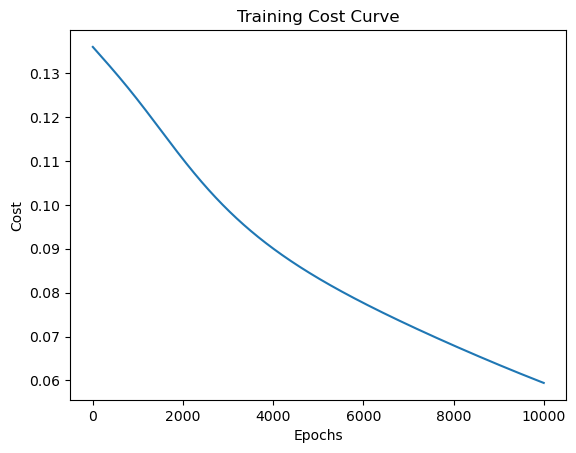

In [87]:
import matplotlib.pyplot as plt
plt.plot([c.mean() for c in costs])
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Training Cost Curve")
plt.show()


Full 4-bit Accuracy: 30.00%
